<a href="https://colab.research.google.com/github/shylitboi/Personal-Project/blob/main/LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# 코랩에서 한글 출력되도록
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] =False

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 35 not upgraded.
Need to get 10.3 MB of archives.
After this operation, 34.1 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy/universe amd64 fonts-nanum all 20200506-1 [10.3 MB]
Fetched 10.3 MB in 1s (10.0 MB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 78, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package fonts-nanum.
(Reading database ... 126284 files and direc

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/씀씀이🌐/ILI/data/INF_B 전처리.csv")
df

,COUNTRY,DATE,YEAR,WEEK,YEAR_WEEK,INF_B,cycle,weekx,weeky,occur_t-0,...,occur_t-43,occur_t-44,occur_t-45,occur_t-46,occur_t-47,occur_t-48,occur_t-49,occur_t-50,occur_t-51,occur_t-52
0,Afghanistan,2014-01-05,2014,1,2014_01,0.0,52,0.597109,0.802160,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
1,Afghanistan,2014-01-12,2014,2,2014_02,0.0,52,0.957954,0.286923,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
2,Afghanistan,2014-01-19,2014,3,2014_03,0.0,52,0.939757,-0.341844,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
3,Afghanistan,2014-01-26,2014,4,2014_04,0.0,52,0.549718,-0.835351,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
4,Afghanistan,2014-02-02,2014,5,2014_05,0.0,52,-0.057833,-0.998326,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63940,"occupied Palestinian territory, including east...",2025-03-30,2025,13,2025_13,0.0,17,-0.919197,0.393799,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.045455,0.000000,0.000000
63941,"occupied Palestinian territory, including east...",2025-04-06,2025,14,2025_14,0.0,17,0.917154,0.398534,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.045455,0.000000
63942,"occupied Palestinian territory, including east...",2025-04-13,2025,15,2025_15,0.0,17,-0.339326,-0.940669,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.045455
63943,"occupied Palestinian territory, including east...",2025-04-20,2025,16,2025_16,0.0,17,-0.451528,0.892257,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000


In [ ]:
df2 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/씀씀이🌐/ILI/data/country_similarity.csv")
df2

,COUNTRY,lag,cosine_similarity,dtw_distance,dtw_scaled,final_score
0,Japan,0,0.736677,21.574575,0.000000,0.736677
1,Canada,0,0.660342,22.833219,0.038522,0.621820
2,"United Kingdom, Scotland",0,0.603473,22.412997,0.025661,0.577812
3,United States of America,0,0.563960,26.109242,0.138788,0.425173
4,China,0,0.630938,29.711060,0.249025,0.381913
...,...,...,...,...,...,...
141,Chile,19,0.443564,48.920226,0.836940,-0.393376
142,Lao People's Democratic Republic,2,0.375959,46.718678,0.769560,-0.393601
143,Honduras,52,0.237571,45.619318,0.735913,-0.498341
144,Guatemala,45,0.361180,54.247934,1.000000,-0.638820


In [ ]:
weather = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/씀씀이🌐/ILI/data/기상.csv")
weather.shape

(435, 4)

In [ ]:
!pip install tensorflow scikit-learn

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from datetime import datetime
import matplotlib.dates as mdates

# 함수 정의

In [ ]:
def prepare_data():
    """기본 데이터 전처리 함수"""
    # DATE 컬럼을 datetime으로 변환
    df['DATE'] = pd.to_datetime(df['DATE'])

    # 2020-2022년 제외 (코로나19 영향)
    years_to_exclude = [2020, 2021, 2022]
    df_filtered = df[~df['DATE'].dt.year.isin(years_to_exclude)].copy()

    # 한국 데이터 추출
    korea_data = df_filtered[df_filtered['COUNTRY'] == 'Republic of Korea'].copy()
    korea_data = korea_data.sort_values('DATE').reset_index(drop=True)

    return df_filtered, korea_data

In [ ]:
# --- 2. 시계열 데이터 생성 함수 ---
def create_sequences(data, sequence_length=12):
    """시계열 데이터를 LSTM 입력 형태로 변환"""
    X, y = [], []
    for i in range(sequence_length, len(data)):
        X.append(data[i-sequence_length:i])
        y.append(data[i])
    return np.array(X), np.array(y)

# --- 개선된 데이터 준비 함수 ---
def prepare_lstm_data(features_df, target_col='INF_B', sequence_length=12, test_start='2024-12-01'):
    """개선된 LSTM 데이터 준비 함수"""
    print(f"입력 데이터 형태: {features_df.shape}")
    print(f"컬럼: {features_df.columns.tolist()}")

    # 결측치 확인 및 처리
    print(f"결측치 개수: {features_df.isnull().sum().sum()}")
    features_df = features_df.fillna(method='ffill').fillna(method='bfill')

    # 훈련/테스트 분할
    train_data = features_df[features_df['DATE'] < test_start].copy()
    test_data = features_df[features_df['DATE'] >= test_start].copy()

    print(f"훈련 데이터 기간: {train_data['DATE'].min()} ~ {train_data['DATE'].max()}")
    print(f"테스트 데이터 기간: {test_data['DATE'].min()} ~ {test_data['DATE'].max()}")

    # 특성 컬럼 선택 (DATE 제외)
    feature_cols = [col for col in features_df.columns if col != 'DATE']
    print(f"사용할 특성: {feature_cols}")

    # 스케일링
    scaler = MinMaxScaler()
    train_scaled = scaler.fit_transform(train_data[feature_cols])
    test_scaled = scaler.transform(test_data[feature_cols])

    print(f"스케일링 후 훈련 데이터 형태: {train_scaled.shape}")
    print(f"스케일링 후 테스트 데이터 형태: {test_scaled.shape}")

    # 시퀀스 생성
    X_train, y_train = create_sequences(train_scaled, sequence_length)
    X_test, y_test = create_sequences(test_scaled, sequence_length)

    # 타겟 변수 인덱스 (INF_B는 항상 첫 번째 컬럼)
    target_idx = feature_cols.index(target_col)
    y_train = y_train[:, target_idx]
    y_test = y_test[:, target_idx]

    print(f"최종 훈련 시퀀스 형태: X_train={X_train.shape}, y_train={y_train.shape}")
    print(f"최종 테스트 시퀀스 형태: X_test={X_test.shape}, y_test={y_test.shape}")

    return X_train, X_test, y_train, y_test, scaler, train_data, test_data, feature_cols, target_idx

# --- 개선된 예측값 복원 함수 ---
def inverse_transform_predictions(y_pred_scaled, y_test_scaled, scaler, target_idx, n_features):
    """예측값을 원래 스케일로 복원"""
    # 예측값 복원을 위한 더미 배열 생성
    y_pred_dummy = np.zeros((len(y_pred_scaled), n_features))
    y_pred_dummy[:, target_idx] = y_pred_scaled.flatten()
    y_pred_original = scaler.inverse_transform(y_pred_dummy)[:, target_idx]

    # 실제값 복원
    y_test_dummy = np.zeros((len(y_test_scaled), n_features))
    y_test_dummy[:, target_idx] = y_test_scaled
    y_test_original = scaler.inverse_transform(y_test_dummy)[:, target_idx]

    return y_pred_original, y_test_original

In [ ]:
def create_lstm_model(input_shape, lstm_units=50, dropout_rate=0.2):
    model = Sequential([
        LSTM(lstm_units, return_sequences=True, input_shape=input_shape),
        Dropout(dropout_rate),
        LSTM(lstm_units, return_sequences=False),
        Dropout(dropout_rate),
        Dense(25),
        Dense(1)
    ])

    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])
    return model

In [ ]:
# --- 4. 모델 평가 함수 ---
def evaluate_model(y_true, y_pred, model_name="Model"):
    """모델 성능 평가"""
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    print(f"\n--- {model_name} 성능 평가 ---")
    print(f"RMSE: {rmse:.4f}")
    print(f"MAE: {mae:.4f}")
    print(f"R²: {r2:.4f}")

    return {'rmse': rmse, 'mae': mae, 'r2': r2}

In [ ]:
# --- 5. 시각화 함수 ---
def plot_predictions(train_data, test_data, y_test, y_pred, model_name="LSTM Model", sequence_length=12):
    """예측 결과 시각화"""
    plt.figure(figsize=(15, 8))

    # 훈련 데이터
    plt.plot(train_data['DATE'], train_data['INF_B'], label='훈련 데이터', color='blue', alpha=0.7)

    # 실제 테스트 데이터 (시퀀스 길이만큼 조정)
    test_dates = test_data['DATE'].iloc[sequence_length:]
    plt.plot(test_dates, y_test, label='실제 테스트 데이터', color='black', linewidth=2)
    # 예측 데이터
    plt.plot(test_dates, y_pred, label=f'{model_name} 예측', color='red', linewidth=2, linestyle='--')

    plt.title(f'{model_name} 예측 결과', fontsize=16, fontweight='bold')
    plt.xlabel('날짜')
    plt.ylabel('INF_B 값')
    plt.legend()
    plt.grid(True, alpha=0.3)

    # x축 날짜 포맷팅
    ax = plt.gca()
    ax.xaxis.set_major_locator(mdates.MonthLocator(interval=3))
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m'))
    plt.xticks(rotation=45)

    plt.tight_layout()
    plt.show()

In [ ]:
# --- 6. 메인 실행 코드 ---

# 데이터 준비
df_filtered, korea_data = prepare_data()

print("=== LSTM 점진적 모델링 시작 ===")
print(f"전체 데이터 기간: {df_filtered['DATE'].min()} ~ {df_filtered['DATE'].max()}")
print(f"한국 데이터 포인트 수: {len(korea_data)}")

# 성능 추적을 위한 리스트
performance_history = []
best_rmse = float('inf')
selected_countries = []

=== LSTM 점진적 모델링 시작 ===
전체 데이터 기간: 2014-01-05 00:00:00 ~ 2025-04-27 00:00:00
한국 데이터 포인트 수: 435


# 한국 ILI LSTM


단계 0: 한국 ILI 데이터만으로 기본 LSTM 모델
입력 데이터 형태: (435, 2)
컬럼: ['DATE', 'INF_B']
결측치 개수: 0
훈련 데이터 기간: 2014-01-05 00:00:00 ~ 2024-11-24 00:00:00
테스트 데이터 기간: 2024-12-01 00:00:00 ~ 2025-04-27 00:00:00
사용할 특성: ['INF_B']
스케일링 후 훈련 데이터 형태: (413, 1)
스케일링 후 테스트 데이터 형태: (22, 1)
최종 훈련 시퀀스 형태: X_train=(401, 12, 1), y_train=(401,)
최종 테스트 시퀀스 형태: X_test=(10, 12, 1), y_test=(10,)
훈련 데이터 형태: (401, 12, 1)
테스트 데이터 형태: (10, 12, 1)

모델 훈련 중...
Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 9s 332ms/step - loss: 0.0259 - mae: 0.0935 - val_loss: 0.0126 - val_mae: 0.0895
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 2s 44ms/step - loss: 0.0240 - mae: 0.1016 - val_loss: 0.0114 - val_mae: 0.0592
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.0182 - mae: 0.0791 - val_loss: 0.0100 - val_mae: 0.0749
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.0170 - mae: 0.0880 - val_loss: 0.0089 - val_mae: 0.0663
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.0129 - mae: 0.0710 - val_loss: 0.0080 - val_mae:


--- 한국 단독 LSTM 성능 평가 ---
RMSE: 20.4977
MAE: 18.6900
R²: 0.6145


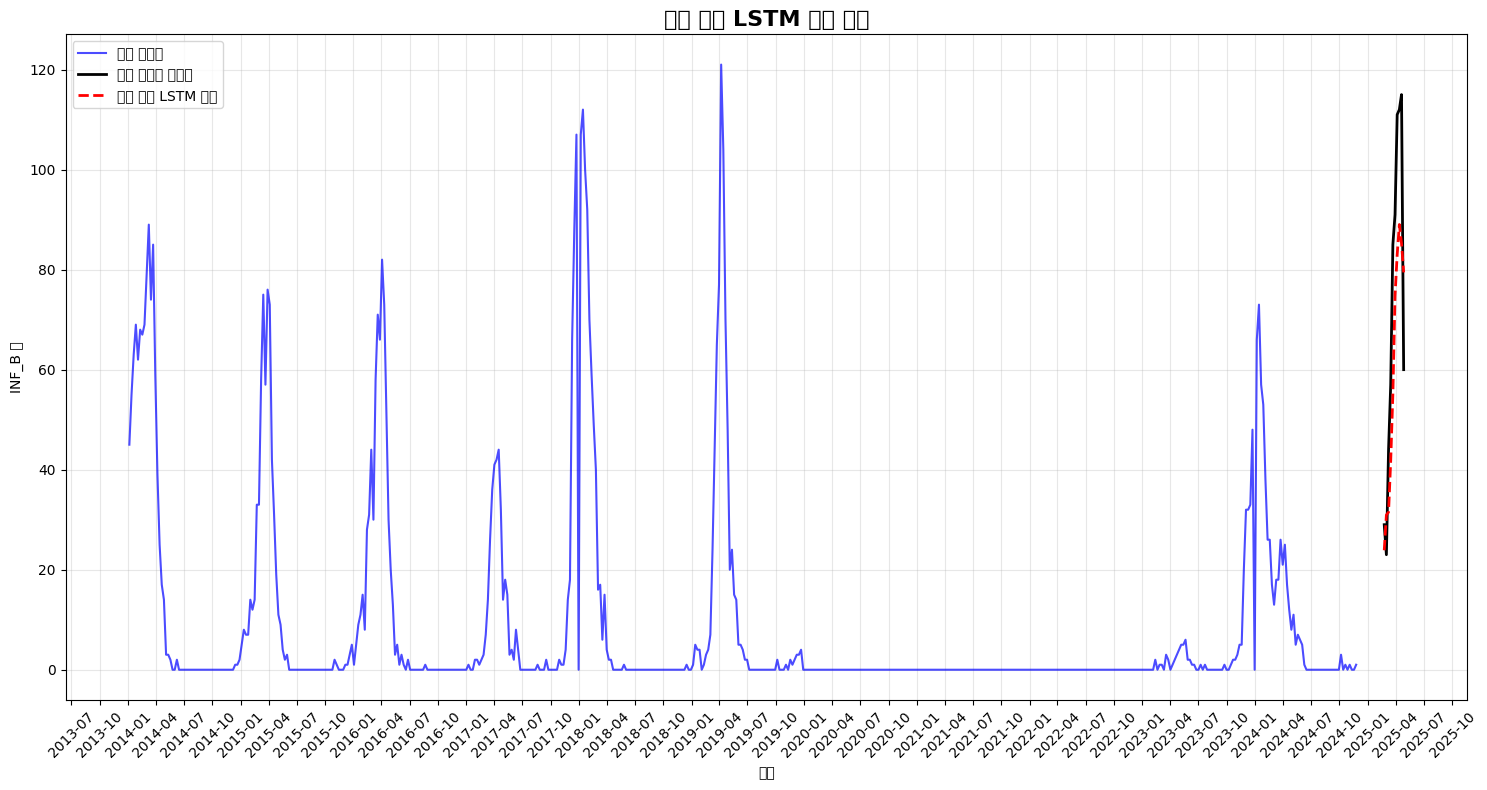

In [ ]:
# --- 단계 0: 한국 단독 LSTM 모델 (원래 버전) ---
print("\n" + "="*50)
print("단계 0: 한국 ILI 데이터만으로 기본 LSTM 모델")
print("="*50)

# 한국 데이터만 사용
korea_features = korea_data[['DATE', 'INF_B']].copy()

# LSTM 데이터 준비
X_train, X_test, y_train, y_test, scaler, train_data, test_data, feature_cols, target_idx = prepare_lstm_data(
    korea_features, target_col='INF_B', sequence_length=12, test_start='2024-12-01'
)

print(f"훈련 데이터 형태: {X_train.shape}")
print(f"테스트 데이터 형태: {X_test.shape}")

# 원래 모델 생성
baseline_model = create_lstm_model(input_shape=(X_train.shape[1], X_train.shape[2]))
print("\n모델 훈련 중...")

# 원래 훈련 설정
history = baseline_model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    verbose=1,
    shuffle=False
)

# 예측 및 성능 평가
y_pred_scaled = baseline_model.predict(X_test)
y_pred, y_test_actual = inverse_transform_predictions(
    y_pred_scaled, y_test, scaler, target_idx, len(feature_cols)
)

baseline_performance = evaluate_model(y_test_actual, y_pred, "한국 단독 LSTM")

# 성능 기록 및 베이스라인 설정
performance_history = []
performance_history.append({
    'step': 0,
    'countries': ['Korea Only'],
    'rmse': baseline_performance['rmse'],
    'r2': baseline_performance['r2'],
    'mae': baseline_performance['mae']
})

best_rmse = baseline_performance['rmse']
selected_countries = []
current_combined_data = korea_features.copy()

# 시각화
plot_predictions(train_data, test_data, y_test_actual, y_pred, "한국 단독 LSTM", sequence_length=12)


# 외국 ILI 추가 - 앙상블
---
```
앙상블 하는 이유 : 단일 모델에 변수를 추가한느 방식으로 했더니 오히려 변수가 추가되면 성능이 하락하는 문제 발생
```

1) 차원 증가로 인한 파라미터 폭증

    한국 단독: (batch, 12, 1) → 약 10,000개 파라미터

    한국+일본: (batch, 12, 2) → 약 20,000개 파라미터

    한국+5개국: (batch, 12, 6) → 약 60,000개 파라미터


2) 데이터 부족 문제: 현재 훈련 데이터: 401개 시퀀스 -> 과적합 위험 급증


| **항목**           | **설명**                                                                                                     |
| ---------------- | ---------------------------------------------------------------------------------------------------------- |
| ✅ **독립적 학습**     | - 각 국가별 LSTM 모델이 개별적으로 학습됨<br> - 한국 모델: **자기회귀적 국내 패턴**에 특화<br> - 외국 모델: **자국 고유 패턴**에 집중 가능               |
| ✅ **모델 복잡도 제어**  | - 각 모델은 **단일 시계열만 처리**<br> - 입력 차원이 낮아 파라미터 수가 일정<br> - **파라미터 폭증 억제 → 안정적 학습 유도**                         |
| ✅ **과적합 위험 최소화** | - 다변량 입력 대비 **모델 단순화**<br> - 데이터 수에 비해 feature 수가 적어 **학습 일반화 가능성↑**                                       |
| ✅ **안정적인 학습 보장** | - 시계열의 시차(lag) 및 길이가 달라도 **모델 충돌 없음**<br> - 개별 모델이 잘 수렴하므로 전반적으로 **안정적 예측**                                |
| ✅ **유연한 가중치 조정** | - 예측 결과를 기반으로 \*\*국가별 기여도(weight)\*\*를 조정 가능<br> - 성능에 따라 **적응적 가중 앙상블** 가능 (예: attention, 성능 기반 weight 등) |


In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_squared_error, r2_score

def create_single_country_lstm(input_shape):
    """단일 국가용 LSTM 모델"""
    model = Sequential([
        LSTM(50, return_sequences=True, input_shape=input_shape),
        Dropout(0.2),
        LSTM(50, return_sequences=False),
        Dropout(0.2),
        Dense(25),
        Dense(1)
    ])

    model.compile(optimizer=Adam(learning_rate=0.001), loss='mse', metrics=['mae'])
    return model

def prepare_single_country_data(country_data, target_col='INF_B', sequence_length=12, test_start='2024-12-01'):
    """단일 국가 데이터 준비"""
    # 기존 prepare_lstm_data 함수와 동일한 로직
    return prepare_lstm_data(country_data, target_col, sequence_length, test_start)

In [ ]:
class EnsembleLSTM:
    def __init__(self, sequence_length=12, test_start='2024-12-01'):
        self.sequence_length = sequence_length
        self.test_start = test_start
        self.models = {}
        self.scalers = {}
        self.weights = {}
        self.performance_history = []

    def add_country_model(self, country_name, country_data, lag=0):
        """국가별 LSTM 모델 추가"""
        print(f"\n--- {country_name} LSTM 모델 학습 ---")

        # 데이터 준비
        if lag > 0:
            country_data = country_data.copy()
            country_data['INF_B'] = country_data['INF_B'].shift(lag)
            country_data = country_data.dropna()

        # LSTM 데이터 준비
        X_train, X_test, y_train, y_test, scaler, train_data, test_data, feature_cols, target_idx = prepare_single_country_data(
            country_data, target_col='INF_B', sequence_length=self.sequence_length, test_start=self.test_start
        )

        if X_train.shape[0] == 0:
            print(f"{country_name}: 데이터 부족으로 스킵")
            return None

        # 모델 생성 및 훈련
        model = create_single_country_lstm(input_shape=(X_train.shape[1], X_train.shape[2]))

        history = model.fit(
            X_train, y_train,
            epochs=50,
            batch_size=32,
            validation_split=0.2,
            verbose=1,
            shuffle=False
        )

        # 예측
        y_pred_scaled = model.predict(X_test)
        y_pred, y_test_actual = inverse_transform_predictions(
            y_pred_scaled, y_test, scaler, target_idx, len(feature_cols)
        )

        # 성능 평가
        rmse = np.sqrt(mean_squared_error(y_test_actual, y_pred))
        r2 = r2_score(y_test_actual, y_pred)

        print(f"{country_name} 모델 성능: RMSE={rmse:.4f}, R²={r2:.4f}")

        # 모델 저장
        self.models[country_name] = {
            'model': model,
            'scaler': scaler,
            'feature_cols': feature_cols,
            'target_idx': target_idx,
            'train_data': train_data,
            'test_data': test_data,
            'y_test_actual': y_test_actual,
            'y_pred': y_pred,
            'rmse': rmse,
            'r2': r2
        }

        return rmse

    def calculate_ensemble_weights(self, method='performance'):
        """앙상블 가중치 계산"""
        if method == 'performance':
            # RMSE 역수 기반 가중치 (성능이 좋을수록 높은 가중치)
            rmses = [self.models[country]['rmse'] for country in self.models.keys()]
            inv_rmses = [1/rmse for rmse in rmses]
            total = sum(inv_rmses)

            for i, country in enumerate(self.models.keys()):
                self.weights[country] = inv_rmses[i] / total

        elif method == 'equal':
            # 동일 가중치
            weight = 1.0 / len(self.models)
            for country in self.models.keys():
                self.weights[country] = weight

        print("\n--- 앙상블 가중치 ---")
        for country, weight in self.weights.items():
            print(f"{country}: {weight:.4f}")

    def predict_ensemble(self, method='weighted'):
        """앙상블 예측"""
        if not self.models:
            raise ValueError("학습된 모델이 없습니다.")

        # 모든 모델의 예측값 수집
        predictions = {}
        test_actual = None

        for country, model_data in self.models.items():
            predictions[country] = model_data['y_pred']
            if test_actual is None:
                test_actual = model_data['y_test_actual']

        # 앙상블 예측
        if method == 'weighted':
            if not self.weights:
                self.calculate_ensemble_weights()

            ensemble_pred = np.zeros_like(test_actual)
            for country, pred in predictions.items():
                ensemble_pred += self.weights[country] * pred

        elif method == 'average':
            ensemble_pred = np.mean(list(predictions.values()), axis=0)

        elif method == 'median':
            ensemble_pred = np.median(list(predictions.values()), axis=0)

        # 앙상블 성능 평가
        ensemble_rmse = np.sqrt(mean_squared_error(test_actual, ensemble_pred))
        ensemble_r2 = r2_score(test_actual, ensemble_pred)

        return ensemble_pred, test_actual, ensemble_rmse, ensemble_r2

    def plot_ensemble_results(self):
        """앙상블 결과 시각화"""
        ensemble_pred, test_actual, ensemble_rmse, ensemble_r2 = self.predict_ensemble()

        # 개별 모델 vs 앙상블 성능 비교
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(18, 12))

        # 1. 개별 모델 성능 비교
        countries = list(self.models.keys())
        rmses = [self.models[country]['rmse'] for country in countries]
        rmses.append(ensemble_rmse)
        countries.append('Ensemble')

        colors = ['skyblue'] * (len(countries)-1) + ['red']
        bars = ax1.bar(countries, rmses, color=colors, alpha=0.7)
        ax1.set_title('개별 모델 vs 앙상블 RMSE 비교', fontsize=14, fontweight='bold')
        ax1.set_ylabel('RMSE')
        ax1.tick_params(axis='x', rotation=45)

        # 최적값 강조
        min_idx = np.argmin(rmses)
        bars[min_idx].set_color('gold')
        ax1.text(min_idx, rmses[min_idx] + 0.01, f'최적\n{rmses[min_idx]:.4f}',
                ha='center', va='bottom', fontweight='bold')

        # 2. 예측 결과 시각화
        korea_model = self.models['Korea']
        test_dates = korea_model['test_data']['DATE'].iloc[12:12+len(test_actual)]

        ax2.plot(korea_model['train_data']['DATE'], korea_model['train_data']['INF_B'],
                label='훈련 데이터', color='blue', alpha=0.7)
        ax2.plot(test_dates, test_actual, label='실제 테스트 데이터', color='black', linewidth=2)
        ax2.plot(test_dates, ensemble_pred, label='앙상블 예측', color='red', linewidth=2, linestyle='--')

        ax2.set_title(f'앙상블 예측 결과 (RMSE: {ensemble_rmse:.4f})', fontsize=14, fontweight='bold')
        ax2.set_xlabel('날짜')
        ax2.set_ylabel('INF_B 값')
        ax2.legend()
        ax2.grid(True, alpha=0.3)

        # 3. 가중치 시각화
        weights = list(self.weights.values())
        ax3.pie(weights, labels=countries[:-1], autopct='%1.1f%%', startangle=90)
        ax3.set_title('앙상블 가중치 분포', fontsize=14, fontweight='bold')

        # 4. 실제값 vs 예측값 산점도
        ax4.scatter(test_actual, ensemble_pred, alpha=0.7, color='purple', s=80)
        ax4.plot([test_actual.min(), test_actual.max()],
                [test_actual.min(), test_actual.max()],
                'r--', linewidth=2, alpha=0.8, label='완벽한 예측선')
        ax4.set_title(f'실제값 vs 앙상블 예측값 (R²: {ensemble_r2:.4f})', fontsize=14, fontweight='bold')
        ax4.set_xlabel('실제값')
        ax4.set_ylabel('예측값')
        ax4.legend()
        ax4.grid(True, alpha=0.3)

        plt.tight_layout()
        plt.show()

        return ensemble_pred, test_actual, ensemble_rmse, ensemble_r2


🎯 앙상블 LSTM 모델링 시작

--- Korea LSTM 모델 학습 ---
입력 데이터 형태: (435, 2)
컬럼: ['DATE', 'INF_B']
결측치 개수: 0
훈련 데이터 기간: 2014-01-05 00:00:00 ~ 2024-11-24 00:00:00
테스트 데이터 기간: 2024-12-01 00:00:00 ~ 2025-04-27 00:00:00
사용할 특성: ['INF_B']
스케일링 후 훈련 데이터 형태: (413, 1)
스케일링 후 테스트 데이터 형태: (22, 1)
최종 훈련 시퀀스 형태: X_train=(401, 12, 1), y_train=(401,)
최종 테스트 시퀀스 형태: X_test=(10, 12, 1), y_test=(10,)
Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 9s 117ms/step - loss: 0.0260 - mae: 0.0918 - val_loss: 0.0128 - val_mae: 0.0894
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step - loss: 0.0237 - mae: 0.1055 - val_loss: 0.0114 - val_mae: 0.0630
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0197 - mae: 0.0853 - val_loss: 0.0102 - val_mae: 0.0731
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 47ms/step - loss: 0.0170 - mae: 0.0878 - val_loss: 0.0093 - val_mae: 0.0699
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.0139 - mae: 0.0743 - val_loss: 0.0084 - val_mae: 0.0724
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s

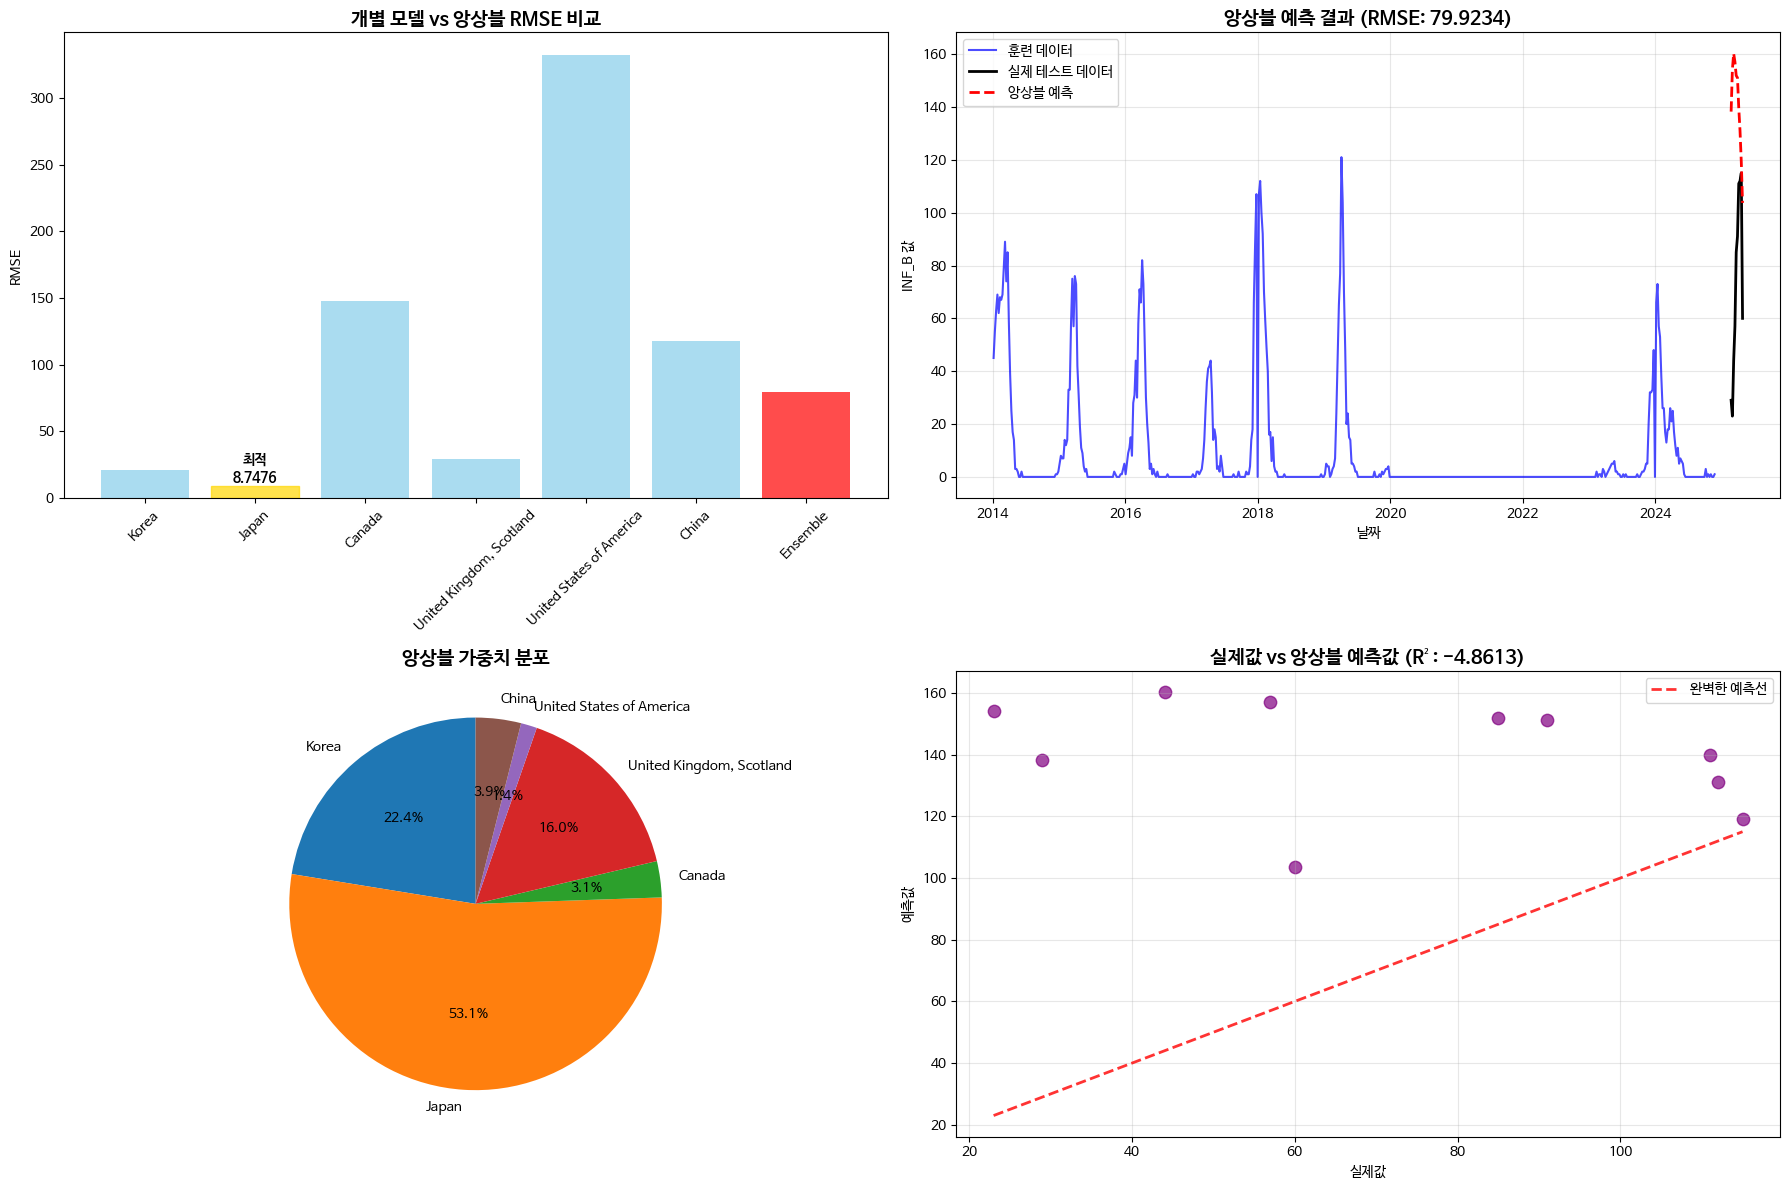


✅ 최종 앙상블 성능:
   • RMSE: 79.9234
   • R²: -4.8613
   • 참여 모델: 6개
   • 선택된 국가: ['Korea', 'Japan', 'Canada', 'United Kingdom, Scotland', 'United States of America', 'China']

📊 개별 모델 대비 성능:
   • Korea: RMSE 20.7009 → 앙상블 대비 -286.09%
   • Japan: RMSE 8.7476 → 앙상블 대비 -813.66%
   • Canada: RMSE 147.8955 → 앙상블 대비 +45.96%
   • United Kingdom, Scotland: RMSE 29.0716 → 앙상블 대비 -174.92%
   • United States of America: RMSE 332.7615 → 앙상블 대비 +75.98%
   • China: RMSE 118.1765 → 앙상블 대비 +32.37%


In [ ]:
# --- 앙상블 LSTM 모델링 ---
print("="*60)
print("🎯 앙상블 LSTM 모델링 시작")
print("="*60)

# 앙상블 객체 생성
ensemble = EnsembleLSTM(sequence_length=12, test_start='2024-12-01')

# 1. 한국 기본 모델 추가
korea_features = korea_data[['DATE', 'INF_B']].copy()
korea_rmse = ensemble.add_country_model('Korea', korea_features, lag=0)

# 2. 유사도 높은 상위 5개국 추가
top_countries = df2.head(5)
selected_countries = ['Korea']

for _, row in top_countries.iterrows():
    country = row['COUNTRY']
    lag = int(row['lag'])

    # 해당 국가 데이터 준비
    country_data = df_filtered[df_filtered['COUNTRY'] == country][['DATE', 'INF_B']].copy()
    country_data = country_data.sort_values('DATE').reset_index(drop=True)

    # 모델 추가
    country_rmse = ensemble.add_country_model(country, country_data, lag=lag)

    if country_rmse is not None:
        selected_countries.append(country)

# 3. 앙상블 가중치 계산
ensemble.calculate_ensemble_weights(method='performance')

# 4. 앙상블 예측 및 시각화
print("\n" + "="*60)
print("🏆 앙상블 결과 분석")
print("="*60)

ensemble_pred, test_actual, ensemble_rmse, ensemble_r2 = ensemble.plot_ensemble_results()

# 5. 최종 성능 요약
print(f"\n✅ 최종 앙상블 성능:")
print(f"   • RMSE: {ensemble_rmse:.4f}")
print(f"   • R²: {ensemble_r2:.4f}")
print(f"   • 참여 모델: {len(ensemble.models)}개")
print(f"   • 선택된 국가: {selected_countries}")

# 개별 모델 성능과 비교
print(f"\n📊 개별 모델 대비 성능:")
for country, model_data in ensemble.models.items():
    improvement = ((model_data['rmse'] - ensemble_rmse) / model_data['rmse'] * 100)
    print(f"   • {country}: RMSE {model_data['rmse']:.4f} → 앙상블 대비 {improvement:+.2f}%")


## 아르헨티나 + 한국

In [ ]:
korea = df[df["COUNTRY"] == "Republic of Korea"][["DATE", "INF_B"]].copy()
argentina = df[df["COUNTRY"] == "Argentina"][["DATE", "INF_B"]].copy()

# 날짜 처리
korea["DATE"] = pd.to_datetime(korea["DATE"])
argentina["DATE"] = pd.to_datetime(argentina["DATE"])

# 주간 시계열로 정렬
korea.set_index("DATE", inplace=True)
argentina.set_index("DATE", inplace=True)

korea = korea.asfreq("W")
argentina = argentina.asfreq("W")

# lag 적용
argentina_lagged = argentina.shift(32).rename(columns={"INF_B": "ARG_INF_B"})

In [ ]:
# --- 2. 데이터 병합 및 2020~2022 제외 ---
combined = pd.concat([korea, argentina_lagged], axis=1)
combined.dropna(inplace=True)

# 연도 필터링
combined = combined[~combined.index.year.isin([2020, 2021, 2022])]

# --- 3. 훈련/테스트 분리 ---
train = combined[combined.index < "2020-01-01"].copy()
test = combined[combined.index >= "2023-01-01"].copy()

# --- 4. LSTM 데이터 준비 ---
from sklearn.preprocessing import MinMaxScaler

def prepare_lstm_input(df, target_col, seq_len):
    feature_cols = df.columns.tolist()
    target_idx = feature_cols.index(target_col)

    scaler = MinMaxScaler()
    scaled = scaler.fit_transform(df)

    X, y = [], []
    for i in range(seq_len, len(df)):
        X.append(scaled[i - seq_len:i])
        y.append(scaled[i, target_idx])

    X = np.array(X)
    y = np.array(y)

    return X, y, scaler, feature_cols, target_idx

sequence_length = 12

X_train, y_train, scaler, feat_cols, tgt_idx = prepare_lstm_input(train, "INF_B", sequence_length)
X_test, y_test, _, _, _ = prepare_lstm_input(test, "INF_B", sequence_length)

# --- 5. 모델 정의 및 훈련 ---
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

def create_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(64, activation="relu", input_shape=input_shape))
    model.add(Dense(1))
    model.compile(optimizer="adam", loss="mse")
    return model

model = create_lstm_model((X_train.shape[1], X_train.shape[2]))

model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1, validation_split=0.2, shuffle=False)

# --- 6. 예측 및 역변환 ---
y_pred_scaled = model.predict(X_test)

# 역변환
def inverse_transform(y_scaled, scaler, target_idx, feature_len):
    dummy = np.zeros((len(y_scaled), feature_len))
    dummy[:, target_idx] = y_scaled.ravel()
    return scaler.inverse_transform(dummy)[:, target_idx]

y_pred = inverse_transform(y_pred_scaled, scaler, tgt_idx, len(feat_cols))
y_actual = inverse_transform(y_test.reshape(-1, 1), scaler, tgt_idx, len(feat_cols))

# --- 7. 평가 ---
rmse = np.sqrt(mean_squared_error(y_actual, y_pred))
mae = mean_absolute_error(y_actual, y_pred)
r2 = r2_score(y_actual, y_pred)

print("\n✅ [한국 + 아르헨티나 (lag=32)] LSTM 성능")
print(f"RMSE: {rmse:.4f}")
print(f"MAE:  {mae:.4f}")
print(f"R²:   {r2:.4f}")


Epoch 1/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 3s 118ms/step - loss: 0.0416 - val_loss: 0.0427
Epoch 2/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - loss: 0.0318 - val_loss: 0.0374
Epoch 3/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0267 - val_loss: 0.0355
Epoch 4/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 50ms/step - loss: 0.0241 - val_loss: 0.0339
Epoch 5/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 67ms/step - loss: 0.0223 - val_loss: 0.0318
Epoch 6/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step - loss: 0.0209 - val_loss: 0.0300
Epoch 7/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step - loss: 0.0199 - val_loss: 0.0284
Epoch 8/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.0187 - val_loss: 0.0266
Epoch 9/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 0.0174 - val_loss: 0.0243
Epoch 10/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 44ms/step - loss: 0.0161 - val_loss: 0.0218
Epoch 11/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.0146 - val_loss: 0.0198
Epoch 12/50
7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - loss: 0.0129 - val_loss: 0.0209


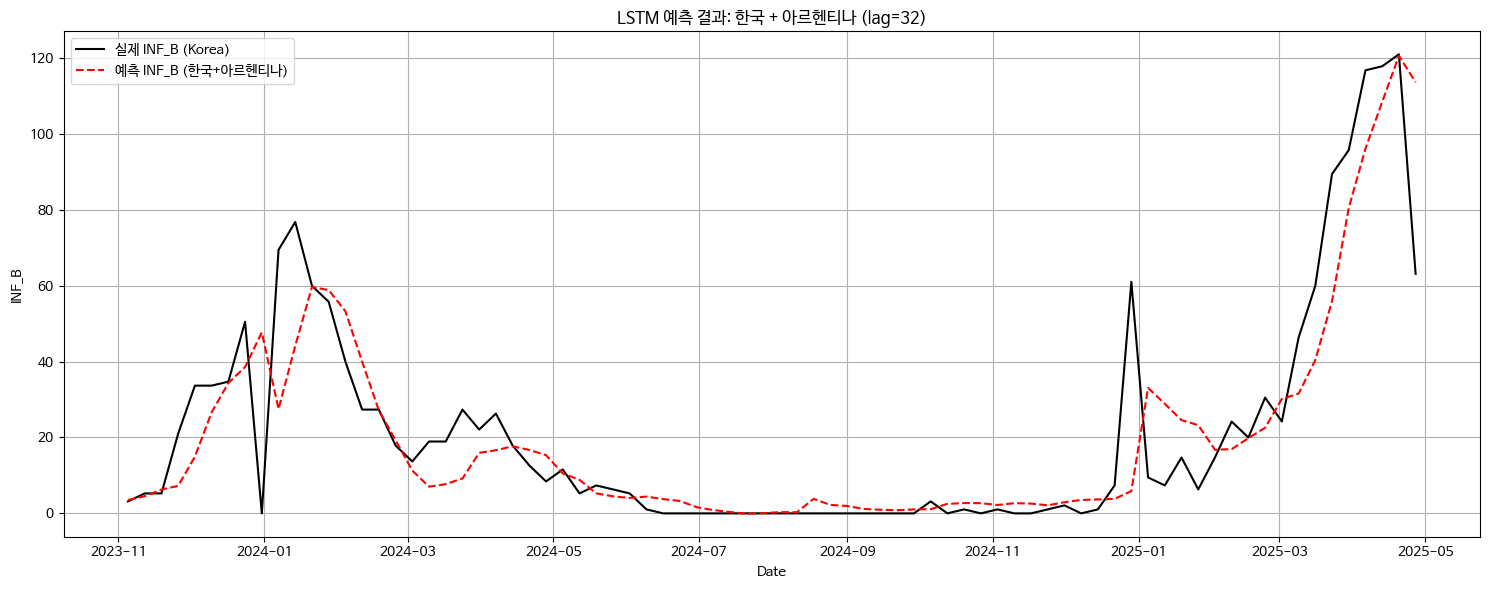

In [ ]:

# 테스트 구간의 날짜 인덱스 (시퀀스 길이만큼 잘려 있기 때문에 그만큼 제외)
test_dates = test.index[sequence_length:]

plt.figure(figsize=(15, 6))
plt.plot(test_dates, y_actual, label="실제 INF_B (Korea)", color="black")
plt.plot(test_dates, y_pred, label="예측 INF_B (한국+아르헨티나)", color="red", linestyle="--")
plt.title("LSTM 예측 결과: 한국 + 아르헨티나 (lag=32)")
plt.xlabel("Date")
plt.ylabel("INF_B")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## 소결론
---
* 남반구 국가(아르헨티나, lag = 32)의 경우 시계열 유사도 점수는 떨어지는데 유일하게 모델 성능을 높이는 변수로 확인됨

| 항목                | 설명                                                                                                                                              |
| ----------------- | ----------------------------------------------------------------------------------------------------------------------------------------------- |
| ❗ **중복 정보 문제**    | 일본과 한국은 **동시기에 독감 시즌이 겹치며**, 유사한 기후/문화/보건 환경을 공유합니다. <br>→ 시계열 패턴이 매우 유사해서 **정보의 중복** 발생 가능성 큼. <br>→ LSTM 모델에서는 **추가적인 설명력 없이 오히려 과적합 리스크 증가** |
| ✅ **비보완적 정보**     | 일본 데이터는 이미 한국 ILI 시계열에 **암묵적으로 반영**되어 있을 수 있음. <br>→ 따라서 일본 데이터를 넣어도 **모델 성능에 실질적 이득 없음**.                                                      |
| ✅ **남반구 데이터의 이점** | 아르헨티나 등 남반구 국가는 계절이 **6개월 차이** → **독감 주기 상 보완적 정보 제공** 가능성. <br>→ 한국 ILI의 **미래 패턴을 선제적으로 반영**할 수 있는 잠재력                                         |
| ✅ **정보 다양성 증가**   | 남반구 국가의 ILI는 **상관 구조는 존재하되 시차는 큼** → LSTM이 이를 통해 **비선형 시차 관계를 학습** 가능. <br>→ 이는 단순 자기회귀에 비해 **모델 예측력 증가에 기여**할 수 있음.                            |


# 기상데이터

In [ ]:
weather['일자'] = pd.to_datetime(weather['일자'])
korea_data['DATE'] = pd.to_datetime(korea_data['DATE'])

# 공통된 날짜 기준으로 병합 (inner join)
merged_df = pd.merge(
    korea_data[['DATE', 'INF_B']],
    weather[['일자', '평균 기온', '일교차', '상대습도']],
    left_on='DATE',
    right_on='일자',
    how='inner'
)

# 날짜 정리
merged_df.drop(columns=['일자'], inplace=True)
merged_df = merged_df.sort_values(by='DATE').reset_index(drop=True)

In [ ]:
merged_df

,DATE,INF_B,평균 기온,일교차,상대습도
0,2014-01-05,45.0,1.3,8.5,47.8
1,2014-01-12,55.0,-2.8,8.0,43.0
2,2014-01-19,63.0,-1.9,8.1,51.7
3,2014-01-26,69.0,-0.7,8.1,59.6
4,2014-02-02,62.0,2.2,8.1,54.1
...,...,...,...,...,...
430,2025-03-30,91.0,9.0,11.4,51.3
431,2025-04-06,111.0,10.2,10.2,61.3
432,2025-04-13,112.0,11.2,10.8,63.4
433,2025-04-20,115.0,16.3,11.4,69.2


입력 데이터 형태: (435, 5)
컬럼: ['DATE', 'INF_B', '평균 기온', '일교차', '상대습도']
결측치 개수: 0
훈련 데이터 기간: 2014-01-05 00:00:00 ~ 2024-11-24 00:00:00
테스트 데이터 기간: 2024-12-01 00:00:00 ~ 2025-04-27 00:00:00
사용할 특성: ['INF_B', '평균 기온', '일교차', '상대습도']
스케일링 후 훈련 데이터 형태: (413, 4)
스케일링 후 테스트 데이터 형태: (22, 4)
최종 훈련 시퀀스 형태: X_train=(401, 12, 4), y_train=(401,)
최종 테스트 시퀀스 형태: X_test=(10, 12, 4), y_test=(10,)
훈련 데이터 형태: (401, 12, 4)
테스트 데이터 형태: (10, 12, 4)

[Weather 확장 모델] 훈련 중...
Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 5s 79ms/step - loss: 0.0389 - mae: 0.1318 - val_loss: 0.0211 - val_mae: 0.1051
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 1s 26ms/step - loss: 0.0260 - mae: 0.1150 - val_loss: 0.0130 - val_mae: 0.0808
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0258 - mae: 0.1124 - val_loss: 0.0121 - val_mae: 0.0715
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0204 - mae: 0.0970 - val_loss: 0.0115 - val_mae: 0.0701
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0191 - mae: 0.0902 -

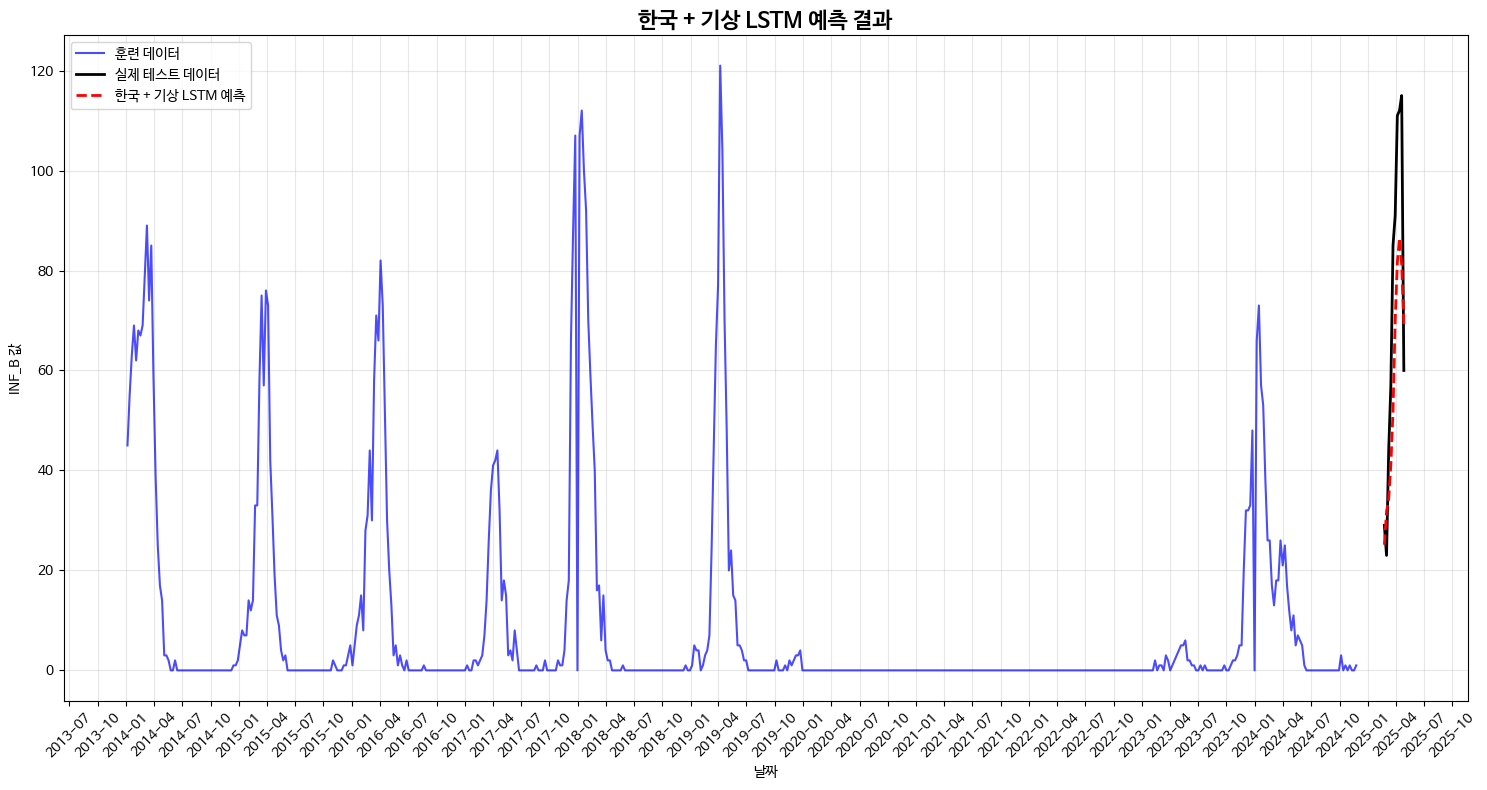

In [ ]:
# 2. LSTM 데이터 준비
X_train, X_test, y_train, y_test, scaler, train_data, test_data, feature_cols, target_idx = prepare_lstm_data(
    merged_df,
    target_col='INF_B',
    sequence_length=12,
    test_start='2024-12-01'
)

print(f"훈련 데이터 형태: {X_train.shape}")
print(f"테스트 데이터 형태: {X_test.shape}")

# 3. 모델 구성 및 학습
weather_model = create_lstm_model(input_shape=(X_train.shape[1], X_train.shape[2]))
print("\n[Weather 확장 모델] 훈련 중...")

history = weather_model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    verbose=1,
    shuffle=False
)

# 4. 예측 및 역정규화
y_pred_scaled = weather_model.predict(X_test)
y_pred, y_test_actual = inverse_transform_predictions(
    y_pred_scaled, y_test, scaler, target_idx, len(feature_cols)
)

# 5. 성능 평가
weather_performance = evaluate_model(y_test_actual, y_pred, "한국 + 기상 LSTM")

# 6. 성능 기록
performance_history.append({
    'step': 1,
    'countries': ['Korea + Weather'],
    'rmse': weather_performance['rmse'],
    'r2': weather_performance['r2'],
    'mae': weather_performance['mae']
})

# 7. 시각화
plot_predictions(train_data, test_data, y_test_actual, y_pred, "한국 + 기상 LSTM", sequence_length=12)

## 교차검증(한국 단독 vs 기상 포함)

In [ ]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import numpy as np
import pandas as pd

# --- 1. 데이터 전처리: 날짜 통합 및 병합 ---
weather['일자'] = pd.to_datetime(weather['일자'])
korea_data['DATE'] = pd.to_datetime(korea_data['DATE'])

merged = pd.merge(
    korea_data[['DATE', 'INF_B']],
    weather[['일자', '평균 기온', '일교차', '상대습도']],
    left_on='DATE',
    right_on='일자',
    how='inner'
).drop(columns='일자').sort_values(by='DATE').reset_index(drop=True)

# --- 2. 2020~2022 제외 ---
merged = merged[~merged['DATE'].dt.year.isin([2020, 2021, 2022])].reset_index(drop=True)

# --- 3. 시계열 기반 커스텀 K-fold 설정 ---
n_splits = 5
sequence_length = 12
dates = merged['DATE']
total_len = len(merged)

# 인덱스 리스트 생성 (뒤쪽 20%씩 잘라가는 구조, 시계열 유지)
fold_size = total_len // (n_splits + 1)

cv_results = {
    '한국 단독': [],
    '기상 포함': []
}

for fold in range(n_splits):
    test_start_idx = fold_size * (fold + 1)
    test_end_idx = test_start_idx + fold_size

    if test_end_idx + sequence_length >= total_len:
        break  # 시퀀스 초과 방지

    train_df = merged.iloc[:test_start_idx]
    test_df = merged.iloc[test_start_idx:test_end_idx]

    # --- (1) 한국 단독 버전 ---
    kor_only = train_df[['DATE', 'INF_B']]
    test_kor_only = test_df[['DATE', 'INF_B']]

    X_train, X_test, y_train, y_test, scaler, _, _, feature_cols, target_idx = prepare_lstm_data(
        pd.concat([kor_only, test_kor_only]),  # 날짜 순서 유지용
        target_col='INF_B',
        sequence_length=sequence_length,
        test_start=test_df['DATE'].iloc[0]
    )

    model = create_lstm_model((X_train.shape[1], X_train.shape[2]))
    model.fit(X_train, y_train, epochs=30, batch_size=32, verbose=0, shuffle=False)

    y_pred_scaled = model.predict(X_test)
    y_pred, y_test_actual = inverse_transform_predictions(
        y_pred_scaled, y_test, scaler, target_idx, len(feature_cols)
    )

    rmse = np.sqrt(mean_squared_error(y_test_actual, y_pred))
    r2 = r2_score(y_test_actual, y_pred)
    mae = mean_absolute_error(y_test_actual, y_pred)
    cv_results['한국 단독'].append((rmse, r2, mae))

    # --- (2) 기상 포함 버전 ---
    weather_cols = ['INF_B', '평균 기온', '일교차', '상대습도']
    weather_train = train_df[['DATE'] + weather_cols]
    weather_test = test_df[['DATE'] + weather_cols]

    X_train, X_test, y_train, y_test, scaler, _, _, feature_cols, target_idx = prepare_lstm_data(
        pd.concat([weather_train, weather_test]),  # 날짜 순서 유지
        target_col='INF_B',
        sequence_length=sequence_length,
        test_start=test_df['DATE'].iloc[0]
    )

    model = create_lstm_model((X_train.shape[1], X_train.shape[2]))
    model.fit(X_train, y_train, epochs=30, batch_size=32, verbose=0, shuffle=False)

    y_pred_scaled = model.predict(X_test)
    y_pred, y_test_actual = inverse_transform_predictions(
        y_pred_scaled, y_test, scaler, target_idx, len(feature_cols)
    )

    rmse = np.sqrt(mean_squared_error(y_test_actual, y_pred))
    r2 = r2_score(y_test_actual, y_pred)
    mae = mean_absolute_error(y_test_actual, y_pred)
    cv_results['기상 포함'].append((rmse, r2, mae))

# --- 4. 교차검증 평균 출력 ---
def summarize_results(results, label):
    rmses = [r[0] for r in results]
    r2s = [r[1] for r in results]
    maes = [r[2] for r in results]
    print(f"\n✅ [{label}] 평균 성능 (K={n_splits})")
    print(f"RMSE: {np.mean(rmses):.4f} ± {np.std(rmses):.4f}")
    print(f"R²:   {np.mean(r2s):.4f} ± {np.std(r2s):.4f}")
    print(f"MAE:  {np.mean(maes):.4f} ± {np.std(maes):.4f}")

summarize_results(cv_results['한국 단독'], '한국 단독')
summarize_results(cv_results['기상 포함'], '기상 포함')


입력 데이터 형태: (144, 2)
컬럼: ['DATE', 'INF_B']
결측치 개수: 0
훈련 데이터 기간: 2014-01-05 00:00:00 ~ 2015-05-17 00:00:00
테스트 데이터 기간: 2015-05-24 00:00:00 ~ 2016-10-02 00:00:00
사용할 특성: ['INF_B']
스케일링 후 훈련 데이터 형태: (72, 1)
스케일링 후 테스트 데이터 형태: (72, 1)
최종 훈련 시퀀스 형태: X_train=(60, 12, 1), y_train=(60,)
최종 테스트 시퀀스 형태: X_test=(60, 12, 1), y_test=(60,)
1/2 ━━━━━━━━━━━━━━━━━━━━ 0s 303ms/step

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 332ms/step
입력 데이터 형태: (144, 5)
컬럼: ['DATE', 'INF_B', '평균 기온', '일교차', '상대습도']
결측치 개수: 0
훈련 데이터 기간: 2014-01-05 00:00:00 ~ 2015-05-17 00:00:00
테스트 데이터 기간: 2015-05-24 00:00:00 ~ 2016-10-02 00:00:00
사용할 특성: ['INF_B', '평균 기온', '일교차', '상대습도']
스케일링 후 훈련 데이터 형태: (72, 4)
스케일링 후 테스트 데이터 형태: (72, 4)
최종 훈련 시퀀스 형태: X_train=(60, 12, 4), y_train=(60,)
최종 테스트 시퀀스 형태: X_test=(60, 12, 4), y_test=(60,)


2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 319ms/step
입력 데이터 형태: (216, 2)
컬럼: ['DATE', 'INF_B']
결측치 개수: 0
훈련 데이터 기간: 2014-01-05 00:00:00 ~ 2016-10-02 00:00:00
테스트 데이터 기간: 2016-10-09 00:00:00 ~ 2018-02-18 00:00:00
사용할 특성: ['INF_B']
스케일링 후 훈련 데이터 형태: (144, 1)
스케일링 후 테스트 데이터 형태: (72, 1)
최종 훈련 시퀀스 형태: X_train=(132, 12, 1), y_train=(132,)
최종 테스트 시퀀스 형태: X_test=(60, 12, 1), y_test=(60,)
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 325ms/step
입력 데이터 형태: (216, 5)
컬럼: ['DATE', 'INF_B', '평균 기온', '일교차', '상대습도']
결측치 개수: 0
훈련 데이터 기간: 2014-01-05 00:00:00 ~ 2016-10-02 00:00:00
테스트 데이터 기간: 2016-10-09 00:00:00 ~ 2018-02-18 00:00:00
사용할 특성: ['INF_B', '평균 기온', '일교차', '상대습도']
스케일링 후 훈련 데이터 형태: (144, 4)
스케일링 후 테스트 데이터 형태: (72, 4)
최종 훈련 시퀀스 형태: X_train=(132, 12, 4), y_train=(132,)
최종 테스트 시퀀스 형태: X_test=(60, 12, 4), y_test=(60,)
2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 335ms/step
입력 데이터 형태: (288, 2)
컬럼: ['DATE', 'INF_B']
결측치 개수: 0
훈련 데이터 기간: 2014-01-05 00:00:00 ~ 2018-02-18 00:00:00
테스트 데이터 기간: 2018-02-25 00:00:00 ~ 2019-07-07 00:00:00
사용할 특성: ['INF_B'

# 남반구 데이터 사용

In [ ]:
cosine = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/씀씀이🌐/ILI/data/cosine.csv')
cosine.columns

Index(['country', 'lag', 'cosine_similarity', 'length_used'], dtype='object')

In [ ]:
# cosine에서 각 나라별로 cosine_similarity가 가장 높은 row만 추출
best_lag_df = cosine.sort_values(by='cosine_similarity', ascending=False)\
                    .drop_duplicates(subset='country', keep='first')\
                    .reset_index(drop=True)

# 결과 확인
print("✅ 국가별 최적 lag 및 유사도 추출 결과:")
print(best_lag_df)


✅ 국가별 최적 lag 및 유사도 추출 결과:
     country  lag  cosine_similarity  length_used
0      Japan    0           0.736677          435
1  Argentina   32           0.663167          435
2     Canada    0           0.660342          435
3      China    0           0.630938          435


In [ ]:
# --- Step 0: 남반구 국가 중 cosine 기반 최적 lag 추출 ---
target_countries = ['Argentina', 'Australia', 'Chile', 'South Africa', 'New Zealand', 'Brazil']

# 가장 높은 cosine 유사도를 가진 lag만 각 나라별 추출
best_lag_df = cosine[cosine['country'].isin(target_countries)]
best_lag_df = best_lag_df.sort_values(by='cosine_similarity', ascending=False)
best_lag_df = best_lag_df.drop_duplicates(subset='country', keep='first').reset_index(drop=True)

# threshold 기준 적용 (예: 0.3 이상)
similarity_threshold = 0.3
selected = []
for _, row in best_lag_df.iterrows():
    if row['cosine_similarity'] >= similarity_threshold:
        selected.append({'country': row['country'], 'lag': int(row['lag'])})

In [ ]:
selected

[{'country': 'Argentina', 'lag': 32}]

* 아르헨티나 밖에 없음..! -> 아까 결과 사용하면 될듯?

# 한국 + 아르헨티나 + 기상

In [ ]:
# --- 1. 병합 데이터 준비 (한국 + 아르헨티나(lag32) + 기상) ---
weather['일자'] = pd.to_datetime(weather['일자'])
korea_data['DATE'] = pd.to_datetime(korea_data['DATE'])
argentina = df[df['COUNTRY'] == 'Argentina'][['DATE', 'INF_B']].copy()
argentina['DATE'] = pd.to_datetime(argentina['DATE'])
argentina.set_index('DATE', inplace=True)
argentina = argentina.asfreq('W').shift(32).rename(columns={'INF_B': 'ARG_INF_B'}).reset_index()

# 한국 + 기상 데이터 병합
merged_df = pd.merge(
    korea_data[['DATE', 'INF_B']],
    weather[['일자', '평균 기온', '일교차', '상대습도']],
    left_on='DATE',
    right_on='일자',
    how='inner'
)

merged_df.drop(columns=['일자'], inplace=True)

# 한국 + 기상 + 아르헨티나 병합
merged_df = pd.merge(
    merged_df,
    argentina,
    how='left',
    on='DATE'
)

# 2020~2022 제외
merged_df = merged_df[~merged_df['DATE'].dt.year.isin([2020, 2021, 2022])]
merged_df = merged_df.sort_values(by='DATE').reset_index(drop=True)

In [ ]:
merged_df

,DATE,INF_B,평균 기온,일교차,상대습도,ARG_INF_B
0,2014-01-05,45.0,1.3,8.5,47.8,NaN
1,2014-01-12,55.0,-2.8,8.0,43.0,NaN
2,2014-01-19,63.0,-1.9,8.1,51.7,NaN
3,2014-01-26,69.0,-0.7,8.1,59.6,NaN
4,2014-02-02,62.0,2.2,8.1,54.1,NaN
...,...,...,...,...,...,...
430,2025-03-30,91.0,9.0,11.4,51.3,88.0
431,2025-04-06,111.0,10.2,10.2,61.3,87.0
432,2025-04-13,112.0,11.2,10.8,63.4,145.0
433,2025-04-20,115.0,16.3,11.4,69.2,138.0


입력 데이터 형태: (435, 6)
컬럼: ['DATE', 'INF_B', '평균 기온', '일교차', '상대습도', 'ARG_INF_B']
결측치 개수: 64
훈련 데이터 기간: 2014-01-05 00:00:00 ~ 2024-11-24 00:00:00
테스트 데이터 기간: 2024-12-01 00:00:00 ~ 2025-04-27 00:00:00
사용할 특성: ['INF_B', '평균 기온', '일교차', '상대습도', 'ARG_INF_B']
스케일링 후 훈련 데이터 형태: (413, 5)
스케일링 후 테스트 데이터 형태: (22, 5)
최종 훈련 시퀀스 형태: X_train=(401, 12, 5), y_train=(401,)
최종 테스트 시퀀스 형태: X_test=(10, 12, 5), y_test=(10,)

[한국 + 기상 + 아르헨티나 모델] 훈련 중...
Epoch 1/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 6s 52ms/step - loss: 0.0413 - val_loss: 0.0192
Epoch 2/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0289 - val_loss: 0.0158
Epoch 3/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0233 - val_loss: 0.0157
Epoch 4/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0198 - val_loss: 0.0118
Epoch 5/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0169 - val_loss: 0.0108
Epoch 6/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0145 - val_loss: 0.0081
Epoch 7/50
10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - lo

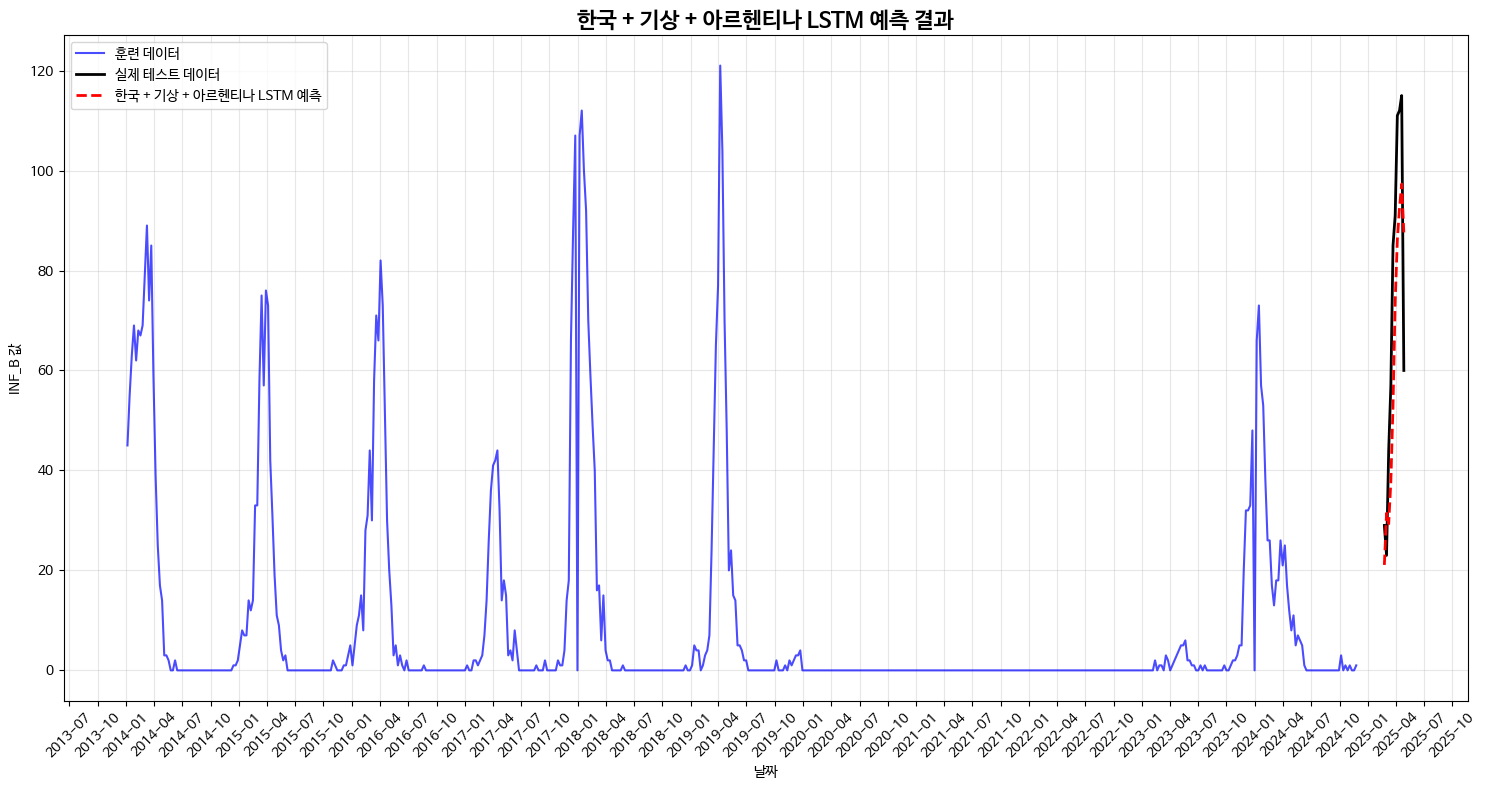

In [ ]:
# --- 2. LSTM 데이터 준비 ---
X_train, X_test, y_train, y_test, scaler, train_data, test_data, feature_cols, target_idx = prepare_lstm_data(
    merged_df,
    target_col='INF_B',
    sequence_length=12,
    test_start='2024-12-01'
)

# --- 3. 모델 구성 및 학습 ---
fusion_model = create_lstm_model(input_shape=(X_train.shape[1], X_train.shape[2]))
print("\n[한국 + 기상 + 아르헨티나 모델] 훈련 중...")

history = fusion_model.fit(
    X_train, y_train,
    epochs=50,
    batch_size=32,
    validation_split=0.2,
    verbose=1,
    shuffle=False
)

# --- 4. 예측 및 역정규화 ---
y_pred_scaled = fusion_model.predict(X_test)
y_pred, y_test_actual = inverse_transform_predictions(
    y_pred_scaled, y_test, scaler, target_idx, len(feature_cols)
)

# --- 5. 성능 평가 ---
fusion_performance = evaluate_model(y_test_actual, y_pred, "한국 + 기상 + 아르헨티나 LSTM")

# --- 6. 성능 기록 ---
performance_history.append({
    'step': 2,
    'countries': ['Korea + Weather + Argentina'],
    'rmse': fusion_performance['rmse'],
    'r2': fusion_performance['r2'],
    'mae': fusion_performance['mae']
})

# --- 7. 시각화 ---
plot_predictions(train_data, test_data, y_test_actual, y_pred, "한국 + 기상 + 아르헨티나 LSTM", sequence_length=12)

* 기상 데이터는 포함하면 성능 하락

# 한국 + A

In [ ]:
merged_a = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/씀씀이🌐/ILI/data/inf_A.csv")
merged_a

,DATE,Korea_A,Argentina_A
0,2014-01-05,42.0,0.0
1,2014-01-12,73.0,4.0
2,2014-01-19,92.0,0.0
3,2014-01-26,97.0,0.0
4,2014-02-02,94.0,0.0
...,...,...,...
430,2025-03-30,6.0,109.0
431,2025-04-06,3.0,155.0
432,2025-04-13,8.0,425.0
433,2025-04-20,2.0,452.0


In [ ]:
k_inf_b = korea_data[['DATE', 'INF_B']].copy()
k_inf_a = merged_a[['DATE', 'Korea_A']].copy()

# 날짜 기준 병합
merged_ba = pd.merge(k_inf_b, k_inf_a, on='DATE', how='inner')
merged_ba

NameError: name 'korea_data' is not defined